In [247]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [248]:

num_weeks = 6


start_date = filedate = pd.Timestamp('2022-04-30 00:00:00')


filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):


    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)


    df = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(df)


    filedate += pd.Timedelta(days=7)

df = pd.concat(filelist, axis=0, ignore_index=True)

In [249]:

df


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,00:00:00,REGULAR,7703737,2695797
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,04:00:00,REGULAR,7703739,2695803
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,08:00:00,REGULAR,7703749,2695831
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,12:00:00,REGULAR,7703774,2695912
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,16:00:00,REGULAR,7703824,2695965
...,...,...,...,...,...,...,...,...,...,...,...
1267241,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,05:00:00,REGULAR,0,433
1267242,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,09:00:00,REGULAR,0,433
1267243,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,13:00:00,REGULAR,0,433
1267244,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,17:00:00,REGULAR,0,435


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267246 entries, 0 to 1267245
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype         
---  ------                                                                --------------    -----         
 0   C/A                                                                   1267246 non-null  object        
 1   UNIT                                                                  1267246 non-null  object        
 2   SCP                                                                   1267246 non-null  object        
 3   STATION                                                               1267246 non-null  object        
 4   LINENAME                                                              1267246 non-null  object        
 5   DIVISION                                                              1267246 non-null  object        
 6   DATE              

In [251]:
df.describe()

,ENTRIES,EXITS
count,1.267246e+06,1.267246e+06
mean,4.325035e+07,3.487661e+07
std,2.242840e+08,1.982567e+08
min,0.000000e+00,0.000000e+00
25%,2.510140e+05,1.339952e+05
50%,1.353003e+06,8.916225e+05
75%,5.958673e+06,3.976511e+06
max,2.147298e+09,2.122339e+09


### fix the column names

In [252]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [253]:
df.columns = [column.strip() for column in df.columns]

In [254]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

### organizing the date time

In [255]:

from datetime import datetime
df["DATE_TIME"] = df.DATE.dt.strftime("%y/%m/%d")


In [256]:

df.DATE_TIME[1]

'22/04/23'

In [257]:


df["DATE_TIME"] = pd.to_datetime(df.DATE_TIME + " " + df.TIME, format="%y/%m/%d %H:%M:%S")
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,00:00:00,REGULAR,7703737,2695797,2022-04-23 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,04:00:00,REGULAR,7703739,2695803,2022-04-23 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,08:00:00,REGULAR,7703749,2695831,2022-04-23 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,12:00:00,REGULAR,7703774,2695912,2022-04-23 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,16:00:00,REGULAR,7703824,2695965,2022-04-23 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1267241,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,05:00:00,REGULAR,0,433,2022-06-03 05:00:00
1267242,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,09:00:00,REGULAR,0,433,2022-06-03 09:00:00
1267243,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,13:00:00,REGULAR,0,433,2022-06-03 13:00:00
1267244,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,17:00:00,REGULAR,0,435,2022-06-03 17:00:00


### Create a new columns day, month

In [258]:
df["day"] = df["DATE"].dt.day
df["month"] = df["DATE"].dt.month


In [259]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,day,month
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,00:00:00,REGULAR,7703737,2695797,2022-04-23 00:00:00,23,4
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,04:00:00,REGULAR,7703739,2695803,2022-04-23 04:00:00,23,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,08:00:00,REGULAR,7703749,2695831,2022-04-23 08:00:00,23,4
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,12:00:00,REGULAR,7703774,2695912,2022-04-23 12:00:00,23,4
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,16:00:00,REGULAR,7703824,2695965,2022-04-23 16:00:00,23,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267241,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,05:00:00,REGULAR,0,433,2022-06-03 05:00:00,3,6
1267242,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,09:00:00,REGULAR,0,433,2022-06-03 09:00:00,3,6
1267243,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,13:00:00,REGULAR,0,433,2022-06-03 13:00:00,3,6
1267244,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,17:00:00,REGULAR,0,435,2022-06-03 17:00:00,3,6


### Create a unıque id for every turnstile

In [260]:
df_g = df.groupby(["C/A", "UNIT", "SCP", "day"])["STATION"].count()
df_g.head(10)

C/A   UNIT  SCP       day
A002  R051  02-00-00  1      12
                      2      12
                      3      12
                      4       6
                      5       6
                      6       6
                      7       6
                      8       6
                      9       6
                      10      6
Name: STATION, dtype: int64

* we have six entries because the dataset has 4 hours of measurement. 24/4 = 6
* Observations with 12 entries look suspicious.

C/A + UNIT + SCP = unıqe id for turnstile of the station


In [261]:
df_g = df.groupby(["C/A", "UNIT", "SCP", "DATE_TIME", "STATION"])["ENTRIES"].count()
df_g.head(10)

C/A   UNIT  SCP       DATE_TIME            STATION
A002  R051  02-00-00  2022-04-23 00:00:00  59 ST      1
                      2022-04-23 04:00:00  59 ST      1
                      2022-04-23 08:00:00  59 ST      1
                      2022-04-23 12:00:00  59 ST      1
                      2022-04-23 16:00:00  59 ST      1
                      2022-04-23 20:00:00  59 ST      1
                      2022-04-24 00:00:00  59 ST      1
                      2022-04-24 04:00:00  59 ST      1
                      2022-04-24 08:00:00  59 ST      1
                      2022-04-24 12:00:00  59 ST      1
Name: ENTRIES, dtype: int64

In [262]:
df["unq_turn"] = df["C/A"] +"_" + df["UNIT"] + "_" +  df["STATION"] + "_" + df["SCP"]
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,day,month,unq_turn
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,00:00:00,REGULAR,7703737,2695797,2022-04-23 00:00:00,23,4,A002_R051_59 ST_02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,04:00:00,REGULAR,7703739,2695803,2022-04-23 04:00:00,23,4,A002_R051_59 ST_02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,08:00:00,REGULAR,7703749,2695831,2022-04-23 08:00:00,23,4,A002_R051_59 ST_02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,12:00:00,REGULAR,7703774,2695912,2022-04-23 12:00:00,23,4,A002_R051_59 ST_02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,16:00:00,REGULAR,7703824,2695965,2022-04-23 16:00:00,23,4,A002_R051_59 ST_02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267241,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,05:00:00,REGULAR,0,433,2022-06-03 05:00:00,3,6,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1267242,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,09:00:00,REGULAR,0,433,2022-06-03 09:00:00,3,6,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1267243,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,13:00:00,REGULAR,0,433,2022-06-03 13:00:00,3,6,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1267244,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,17:00:00,REGULAR,0,435,2022-06-03 17:00:00,3,6,TRAM2_R469_RIT-ROOSEVELT_00-05-01


### Control of suspect entrys

In [263]:
(df.groupby(["unq_turn","DATE_TIME"])  
 .ENTRIES.count()
 .reset_index() 
 .sort_values("ENTRIES", ascending=False)).head(5)

,unq_turn,DATE_TIME,ENTRIES
1015367,R249_R179_86 ST_01-05-01,2022-05-03 00:00:00,2
1015358,R249_R179_86 ST_01-05-01,2022-05-01 12:00:00,2
1015356,R249_R179_86 ST_01-05-01,2022-05-01 04:00:00,2
1015355,R249_R179_86 ST_01-05-01,2022-05-01 00:00:00,2
1015354,R249_R179_86 ST_01-05-01,2022-04-30 20:00:00,2


It cant possible turnstile has a 2 entry on same moment. Lets check out some of them.

In [264]:
mask = ((df["C/A"] == "R249") & 
(df["UNIT"] == "R179") & 
(df["SCP"] == "01-05-01") & 
(df["STATION"] == "86 ST") &
(df["DATE_TIME"] == "2022-05-01 00:00:00"))

df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,day,month,unq_turn
380461,R249,R179,01-05-01,86 ST,456,IRT,2022-05-01,00:00:00,REGULAR,393216,357,2022-05-01,1,5,R249_R179_86 ST_01-05-01
380462,R249,R179,01-05-01,86 ST,456,IRT,2022-05-01,00:00:00,RECOVR AUD,131072,253,2022-05-01,1,5,R249_R179_86 ST_01-05-01


In [265]:

df.DESC.value_counts()

REGULAR       1262200
RECOVR AUD       5046
Name: DESC, dtype: int64

we can drop the RECOVER AUD

In [266]:
df = df.loc[df.DESC == "REGULAR"]
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,day,month,unq_turn
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,00:00:00,REGULAR,7703737,2695797,2022-04-23 00:00:00,23,4,A002_R051_59 ST_02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,04:00:00,REGULAR,7703739,2695803,2022-04-23 04:00:00,23,4,A002_R051_59 ST_02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,08:00:00,REGULAR,7703749,2695831,2022-04-23 08:00:00,23,4,A002_R051_59 ST_02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,12:00:00,REGULAR,7703774,2695912,2022-04-23 12:00:00,23,4,A002_R051_59 ST_02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-04-23,16:00:00,REGULAR,7703824,2695965,2022-04-23 16:00:00,23,4,A002_R051_59 ST_02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267241,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,05:00:00,REGULAR,0,433,2022-06-03 05:00:00,3,6,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1267242,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,09:00:00,REGULAR,0,433,2022-06-03 09:00:00,3,6,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1267243,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,13:00:00,REGULAR,0,433,2022-06-03 13:00:00,3,6,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1267244,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-06-03,17:00:00,REGULAR,0,435,2022-06-03 17:00:00,3,6,TRAM2_R469_RIT-ROOSEVELT_00-05-01


###Get rid of the duplicate entry

In [267]:
df.sort_values(["unq_turn", "DATE_TIME"], inplace=True, \
                          ascending=False)
df.drop_duplicates(subset=["unq_turn", "DATE_TIME"], inplace=True)

<font color='red'>check linenames!</font>


In [268]:
(df
 .groupby(["unq_turn", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,unq_turn,DATE_TIME,ENTRIES
0,A002_R051_59 ST_02-00-00,2022-04-23 00:00:00,1
841464,R143_R032_TIMES SQ-42 ST_02-00-03,2022-05-28 20:00:00,1
841471,R143_R032_TIMES SQ-42 ST_02-00-03,2022-05-30 00:00:00,1
841470,R143_R032_TIMES SQ-42 ST_02-00-03,2022-05-29 20:00:00,1
841469,R143_R032_TIMES SQ-42 ST_02-00-03,2022-05-29 16:00:00,1


now entries fixed

### Just take a 5. month

In [269]:
df = df[(df["month"] == 5)]
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,day,month,unq_turn
1267227,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,21:00:00,REGULAR,0,426,2022-05-31 21:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1267226,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,17:00:00,REGULAR,0,426,2022-05-31 17:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1267225,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,13:00:00,REGULAR,0,426,2022-05-31 13:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1267224,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,09:00:00,REGULAR,0,426,2022-05-31 09:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1267223,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,05:00:00,REGULAR,0,425,2022-05-31 05:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211276,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,16:00:00,REGULAR,7706366,2699183,2022-05-01 16:00:00,1,5,A002_R051_59 ST_02-00-00
211275,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,12:00:00,REGULAR,7706289,2699128,2022-05-01 12:00:00,1,5,A002_R051_59 ST_02-00-00
211274,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,08:00:00,REGULAR,7706258,2699059,2022-05-01 08:00:00,1,5,A002_R051_59 ST_02-00-00
211273,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,04:00:00,REGULAR,7706251,2699038,2022-05-01 04:00:00,1,5,A002_R051_59 ST_02-00-00


In [270]:
df.reset_index(inplace=True)

In [271]:

df

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,day,month,unq_turn
0,1267227,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,21:00:00,REGULAR,0,426,2022-05-31 21:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1,1267226,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,17:00:00,REGULAR,0,426,2022-05-31 17:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
2,1267225,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,13:00:00,REGULAR,0,426,2022-05-31 13:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
3,1267224,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,09:00:00,REGULAR,0,426,2022-05-31 09:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
4,1267223,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,05:00:00,REGULAR,0,425,2022-05-31 05:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931558,211276,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,16:00:00,REGULAR,7706366,2699183,2022-05-01 16:00:00,1,5,A002_R051_59 ST_02-00-00
931559,211275,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,12:00:00,REGULAR,7706289,2699128,2022-05-01 12:00:00,1,5,A002_R051_59 ST_02-00-00
931560,211274,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,08:00:00,REGULAR,7706258,2699059,2022-05-01 08:00:00,1,5,A002_R051_59 ST_02-00-00
931561,211273,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,04:00:00,REGULAR,7706251,2699038,2022-05-01 04:00:00,1,5,A002_R051_59 ST_02-00-00


In [272]:
df.drop(["index"],axis = 1, inplace = True)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,day,month,unq_turn
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,21:00:00,REGULAR,0,426,2022-05-31 21:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,17:00:00,REGULAR,0,426,2022-05-31 17:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,13:00:00,REGULAR,0,426,2022-05-31 13:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,09:00:00,REGULAR,0,426,2022-05-31 09:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-31,05:00:00,REGULAR,0,425,2022-05-31 05:00:00,31,5,TRAM2_R469_RIT-ROOSEVELT_00-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931558,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,16:00:00,REGULAR,7706366,2699183,2022-05-01 16:00:00,1,5,A002_R051_59 ST_02-00-00
931559,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,12:00:00,REGULAR,7706289,2699128,2022-05-01 12:00:00,1,5,A002_R051_59 ST_02-00-00
931560,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,08:00:00,REGULAR,7706258,2699059,2022-05-01 08:00:00,1,5,A002_R051_59 ST_02-00-00
931561,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-05-01,04:00:00,REGULAR,7706251,2699038,2022-05-01 04:00:00,1,5,A002_R051_59 ST_02-00-00


###change order of columns

In [273]:
df.columns.values


array(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE',
       'TIME', 'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'day', 'month',
       'unq_turn'], dtype=object)

In [274]:
df = df[["unq_turn","DATE_TIME","STATION","day","TIME","ENTRIES","EXITS"]]

In [275]:
df

,unq_turn,DATE_TIME,STATION,day,TIME,ENTRIES,EXITS
0,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 21:00:00,RIT-ROOSEVELT,31,21:00:00,0,426
1,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 17:00:00,RIT-ROOSEVELT,31,17:00:00,0,426
2,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 13:00:00,RIT-ROOSEVELT,31,13:00:00,0,426
3,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 09:00:00,RIT-ROOSEVELT,31,09:00:00,0,426
4,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 05:00:00,RIT-ROOSEVELT,31,05:00:00,0,425
...,...,...,...,...,...,...,...
931558,A002_R051_59 ST_02-00-00,2022-05-01 16:00:00,59 ST,1,16:00:00,7706366,2699183
931559,A002_R051_59 ST_02-00-00,2022-05-01 12:00:00,59 ST,1,12:00:00,7706289,2699128
931560,A002_R051_59 ST_02-00-00,2022-05-01 08:00:00,59 ST,1,08:00:00,7706258,2699059
931561,A002_R051_59 ST_02-00-00,2022-05-01 04:00:00,59 ST,1,04:00:00,7706251,2699038


In [276]:
df

,unq_turn,DATE_TIME,STATION,day,TIME,ENTRIES,EXITS
0,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 21:00:00,RIT-ROOSEVELT,31,21:00:00,0,426
1,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 17:00:00,RIT-ROOSEVELT,31,17:00:00,0,426
2,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 13:00:00,RIT-ROOSEVELT,31,13:00:00,0,426
3,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 09:00:00,RIT-ROOSEVELT,31,09:00:00,0,426
4,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 05:00:00,RIT-ROOSEVELT,31,05:00:00,0,425
...,...,...,...,...,...,...,...
931558,A002_R051_59 ST_02-00-00,2022-05-01 16:00:00,59 ST,1,16:00:00,7706366,2699183
931559,A002_R051_59 ST_02-00-00,2022-05-01 12:00:00,59 ST,1,12:00:00,7706289,2699128
931560,A002_R051_59 ST_02-00-00,2022-05-01 08:00:00,59 ST,1,08:00:00,7706258,2699059
931561,A002_R051_59 ST_02-00-00,2022-05-01 04:00:00,59 ST,1,04:00:00,7706251,2699038


### Sorting

In [277]:
df = df.sort_values(["unq_turn", "DATE_TIME"])
df.head(20)

,unq_turn,DATE_TIME,STATION,day,TIME,ENTRIES,EXITS
931562,A002_R051_59 ST_02-00-00,2022-05-01 00:00:00,59 ST,1,00:00:00,7706247,2699031
931561,A002_R051_59 ST_02-00-00,2022-05-01 04:00:00,59 ST,1,04:00:00,7706251,2699038
931560,A002_R051_59 ST_02-00-00,2022-05-01 08:00:00,59 ST,1,08:00:00,7706258,2699059
931559,A002_R051_59 ST_02-00-00,2022-05-01 12:00:00,59 ST,1,12:00:00,7706289,2699128
931558,A002_R051_59 ST_02-00-00,2022-05-01 16:00:00,59 ST,1,16:00:00,7706366,2699183
931557,A002_R051_59 ST_02-00-00,2022-05-01 20:00:00,59 ST,1,20:00:00,7706444,2699210
931556,A002_R051_59 ST_02-00-00,2022-05-02 00:00:00,59 ST,2,00:00:00,7706470,2699233
931555,A002_R051_59 ST_02-00-00,2022-05-02 04:00:00,59 ST,2,04:00:00,7706472,2699234
931554,A002_R051_59 ST_02-00-00,2022-05-02 08:00:00,59 ST,2,08:00:00,7706478,2699314
931553,A002_R051_59 ST_02-00-00,2022-05-02 12:00:00,59 ST,2,12:00:00,7706516,2699491


In [278]:
temp = df.loc[(df.unq_turn == "A002_R051_59 ST_02-00-00")]
temp.ENTRIES.diff()

931562      NaN
931561      4.0
931560      7.0
931559     31.0
931558     77.0
          ...  
931381      8.0
931380     16.0
931379     54.0
931378    129.0
931377    244.0
Name: ENTRIES, Length: 186, dtype: float64

In [279]:
df.ENTRIES[810760]

4446363

In [280]:

df["unq_turn"].loc[lambda x : x == "A002_R051_59 ST_02-00-00"].index

Int64Index([931562, 931561, 931560, 931559, 931558, 931557, 931556, 931555,
            931554, 931553,
            ...
            931386, 931385, 931384, 931383, 931382, 931381, 931380, 931379,
            931378, 931377],
           dtype='int64', length=186)

In [281]:
temp = df.loc[(df.unq_turn == "A002_R051_59 ST_02-00-00")]
temp

,unq_turn,DATE_TIME,STATION,day,TIME,ENTRIES,EXITS
931562,A002_R051_59 ST_02-00-00,2022-05-01 00:00:00,59 ST,1,00:00:00,7706247,2699031
931561,A002_R051_59 ST_02-00-00,2022-05-01 04:00:00,59 ST,1,04:00:00,7706251,2699038
931560,A002_R051_59 ST_02-00-00,2022-05-01 08:00:00,59 ST,1,08:00:00,7706258,2699059
931559,A002_R051_59 ST_02-00-00,2022-05-01 12:00:00,59 ST,1,12:00:00,7706289,2699128
931558,A002_R051_59 ST_02-00-00,2022-05-01 16:00:00,59 ST,1,16:00:00,7706366,2699183
...,...,...,...,...,...,...,...
931381,A002_R051_59 ST_02-00-00,2022-05-31 04:00:00,59 ST,31,04:00:00,7718574,2709612
931380,A002_R051_59 ST_02-00-00,2022-05-31 08:00:00,59 ST,31,08:00:00,7718590,2709705
931379,A002_R051_59 ST_02-00-00,2022-05-31 12:00:00,59 ST,31,12:00:00,7718644,2709948
931378,A002_R051_59 ST_02-00-00,2022-05-31 16:00:00,59 ST,31,16:00:00,7718773,2710012


this is the template my function(diff()) needs.Monthly traffic of spesific turnstile at a station

In [282]:
len(temp.ENTRIES)

186

###take care of cumulative entries and exits

In [283]:
unq_turn_list = list(df.unq_turn.value_counts().index)
unq_turn_list[:20]

['R237_R046_GRD CNTRL-42 ST_01-00-06',
 'R237_R046_GRD CNTRL-42 ST_01-00-05',
 'R237_R046_GRD CNTRL-42 ST_01-00-04',
 'R237_R046_GRD CNTRL-42 ST_01-00-03',
 'R237_R046_GRD CNTRL-42 ST_01-00-02',
 'R237_R046_GRD CNTRL-42 ST_01-00-01',
 'R237_R046_GRD CNTRL-42 ST_01-00-00',
 'N111_R284_CLINTON-WASH AV_00-00-01',
 'N111_R284_CLINTON-WASH AV_00-06-01',
 'N111_R284_CLINTON-WASH AV_00-06-02',
 'N111_R284_CLINTON-WASH AV_00-00-02',
 'N111_R284_CLINTON-WASH AV_00-06-00',
 'N111_R284_CLINTON-WASH AV_00-00-00',
 'R237B_R047_GRD CNTRL-42 ST_01-00-00',
 'R237B_R047_GRD CNTRL-42 ST_01-00-03',
 'R237B_R047_GRD CNTRL-42 ST_01-00-02',
 'R237B_R047_GRD CNTRL-42 ST_01-00-01',
 'N507_R023_34 ST-HERALD SQ_00-00-00',
 'N507_R023_34 ST-HERALD SQ_00-03-01',
 'N507_R023_34 ST-HERALD SQ_00-03-05']

In [284]:
df.isna().sum()

unq_turn     0
DATE_TIME    0
STATION      0
day          0
TIME         0
ENTRIES      0
EXITS        0
dtype: int64

In [285]:
len(df.ENTRIES)

931563

In [286]:
temp = df[:915]
temp

,unq_turn,DATE_TIME,STATION,day,TIME,ENTRIES,EXITS
931562,A002_R051_59 ST_02-00-00,2022-05-01 00:00:00,59 ST,1,00:00:00,7706247,2699031
931561,A002_R051_59 ST_02-00-00,2022-05-01 04:00:00,59 ST,1,04:00:00,7706251,2699038
931560,A002_R051_59 ST_02-00-00,2022-05-01 08:00:00,59 ST,1,08:00:00,7706258,2699059
931559,A002_R051_59 ST_02-00-00,2022-05-01 12:00:00,59 ST,1,12:00:00,7706289,2699128
931558,A002_R051_59 ST_02-00-00,2022-05-01 16:00:00,59 ST,1,16:00:00,7706366,2699183
...,...,...,...,...,...,...,...
930652,A002_R051_59 ST_02-03-02,2022-05-28 16:00:00,59 ST,28,16:00:00,188926,289462
930651,A002_R051_59 ST_02-03-02,2022-05-28 20:00:00,59 ST,28,20:00:00,189042,289624
930650,A002_R051_59 ST_02-03-02,2022-05-29 00:00:00,59 ST,29,00:00:00,189127,289698
930649,A002_R051_59 ST_02-03-02,2022-05-29 04:00:00,59 ST,29,04:00:00,189145,289709


In [287]:
df[:10]

,unq_turn,DATE_TIME,STATION,day,TIME,ENTRIES,EXITS
931562,A002_R051_59 ST_02-00-00,2022-05-01 00:00:00,59 ST,1,00:00:00,7706247,2699031
931561,A002_R051_59 ST_02-00-00,2022-05-01 04:00:00,59 ST,1,04:00:00,7706251,2699038
931560,A002_R051_59 ST_02-00-00,2022-05-01 08:00:00,59 ST,1,08:00:00,7706258,2699059
931559,A002_R051_59 ST_02-00-00,2022-05-01 12:00:00,59 ST,1,12:00:00,7706289,2699128
931558,A002_R051_59 ST_02-00-00,2022-05-01 16:00:00,59 ST,1,16:00:00,7706366,2699183
931557,A002_R051_59 ST_02-00-00,2022-05-01 20:00:00,59 ST,1,20:00:00,7706444,2699210
931556,A002_R051_59 ST_02-00-00,2022-05-02 00:00:00,59 ST,2,00:00:00,7706470,2699233
931555,A002_R051_59 ST_02-00-00,2022-05-02 04:00:00,59 ST,2,04:00:00,7706472,2699234
931554,A002_R051_59 ST_02-00-00,2022-05-02 08:00:00,59 ST,2,08:00:00,7706478,2699314
931553,A002_R051_59 ST_02-00-00,2022-05-02 12:00:00,59 ST,2,12:00:00,7706516,2699491


In [288]:
import warnings
warnings.filterwarnings('ignore')

In [289]:
def diff(df, col_name,col_name2): 
  """
  Parameters: df:dataframe, col_name:df.ENTRIES, col_name2:df.EXITS...
  We have a all id names in id variable.
  After than we have a sub_df that providing the condition(df.unq_turn == id)
  We are applying .diff() for convert the cumulative value on sub_df
  we can take index of transformed value on index_list
  Now we can use index for update the real df's data
  !!! THIS FUNC  HAS A PERFORMANCE ISSUE
  """
  for id in unq_turn_list:
    
    if len(df.loc[(df.unq_turn == id)] ) > 0:
      sub_df = pd.DataFrame( df.loc[df.unq_turn == id] )
      
      sub_df[col_name] = sub_df[col_name].diff()
      sub_df[col_name2] = sub_df[col_name2].diff()

      
      index_list = df["unq_turn"].loc[lambda x : x == id].index
      for index in index_list: 
        df[col_name][index] = sub_df[col_name][index]
        df[col_name2][index] = sub_df[col_name2][index]
      
  print("done")
      
      

    


    


In [290]:
import time

start = time.time()
diff(df,"ENTRIES","EXITS")
end = time.time()
print("time " + str(end - start))


done
time 1611.1126024723053


In [291]:
df.describe()

,day,ENTRIES,EXITS
count,931563.000000,9.265160e+05,9.265160e+05
mean,16.016663,-2.386573e+02,6.266714e+00
std,8.950815,1.625282e+05,2.202928e+04
min,1.000000,-1.509977e+08,-9.011181e+06
25%,8.000000,4.000000e+00,6.000000e+00
50%,16.000000,2.800000e+01,3.800000e+01
75%,24.000000,9.400000e+01,1.160000e+02
max,31.000000,5.539190e+05,8.724970e+05


In [292]:
df.ENTRIES.min()

-150997677.0

In [293]:
df

,unq_turn,DATE_TIME,STATION,day,TIME,ENTRIES,EXITS
931562,A002_R051_59 ST_02-00-00,2022-05-01 00:00:00,59 ST,1,00:00:00,NaN,NaN
931561,A002_R051_59 ST_02-00-00,2022-05-01 04:00:00,59 ST,1,04:00:00,4.0,7.0
931560,A002_R051_59 ST_02-00-00,2022-05-01 08:00:00,59 ST,1,08:00:00,7.0,21.0
931559,A002_R051_59 ST_02-00-00,2022-05-01 12:00:00,59 ST,1,12:00:00,31.0,69.0
931558,A002_R051_59 ST_02-00-00,2022-05-01 16:00:00,59 ST,1,16:00:00,77.0,55.0
...,...,...,...,...,...,...,...
4,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 05:00:00,RIT-ROOSEVELT,31,05:00:00,0.0,0.0
3,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 09:00:00,RIT-ROOSEVELT,31,09:00:00,0.0,1.0
2,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 13:00:00,RIT-ROOSEVELT,31,13:00:00,0.0,0.0
1,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 17:00:00,RIT-ROOSEVELT,31,17:00:00,0.0,0.0


### take care of nan values

In [294]:
df.isna().sum()

unq_turn        0
DATE_TIME       0
STATION         0
day             0
TIME            0
ENTRIES      5047
EXITS        5047
dtype: int64

In [295]:
df['ENTRIES'] = df['ENTRIES'].fillna(0)

In [296]:
df['EXITS'] = df['EXITS'].fillna(0)

In [297]:
df.isna().sum()

unq_turn     0
DATE_TIME    0
STATION      0
day          0
TIME         0
ENTRIES      0
EXITS        0
dtype: int64

In [298]:
df.describe()

,day,ENTRIES,EXITS
count,931563.000000,9.315630e+05,9.315630e+05
mean,16.016663,-2.373643e+02,6.232763e+00
std,8.950815,1.620874e+05,2.196953e+04
min,1.000000,-1.509977e+08,-9.011181e+06
25%,8.000000,4.000000e+00,6.000000e+00
50%,16.000000,2.800000e+01,3.700000e+01
75%,24.000000,9.400000e+01,1.150000e+02
max,31.000000,5.539190e+05,8.724970e+05


###take care of outliers

In [299]:
def quantile(col): # col : pandas.core.series.Series->df.ENTRIES
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  print("Q1: " + str(Q1))
  print("Q3: " + str(Q3))
  print("IQR: " + str(IQR))


  down_threshold = 0  # Q1 - 1.5*IQR
  up_threshold = 7200 # Q3 + 1.5*IQR
  print("down_threshold: " + str(down_threshold))
  print("up_threshold: " + str(up_threshold))

  return df[(col < up_threshold) & (col >= down_threshold)]

In [300]:
df = quantile(df.EXITS)

Q1: 6.0
Q3: 115.0
IQR: 109.0
down_threshold: 0
up_threshold: 7200


In [301]:
df = quantile(df.ENTRIES)

Q1: 4.0
Q3: 94.0
IQR: 90.0
down_threshold: 0
up_threshold: 7200


In [302]:
df

,unq_turn,DATE_TIME,STATION,day,TIME,ENTRIES,EXITS
931562,A002_R051_59 ST_02-00-00,2022-05-01 00:00:00,59 ST,1,00:00:00,0.0,0.0
931561,A002_R051_59 ST_02-00-00,2022-05-01 04:00:00,59 ST,1,04:00:00,4.0,7.0
931560,A002_R051_59 ST_02-00-00,2022-05-01 08:00:00,59 ST,1,08:00:00,7.0,21.0
931559,A002_R051_59 ST_02-00-00,2022-05-01 12:00:00,59 ST,1,12:00:00,31.0,69.0
931558,A002_R051_59 ST_02-00-00,2022-05-01 16:00:00,59 ST,1,16:00:00,77.0,55.0
...,...,...,...,...,...,...,...
4,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 05:00:00,RIT-ROOSEVELT,31,05:00:00,0.0,0.0
3,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 09:00:00,RIT-ROOSEVELT,31,09:00:00,0.0,1.0
2,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 13:00:00,RIT-ROOSEVELT,31,13:00:00,0.0,0.0
1,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 17:00:00,RIT-ROOSEVELT,31,17:00:00,0.0,0.0


###Create a crowd column

In [303]:
df["crowd"] = df.ENTRIES + df.EXITS
df

,unq_turn,DATE_TIME,STATION,day,TIME,ENTRIES,EXITS,crowd
931562,A002_R051_59 ST_02-00-00,2022-05-01 00:00:00,59 ST,1,00:00:00,0.0,0.0,0.0
931561,A002_R051_59 ST_02-00-00,2022-05-01 04:00:00,59 ST,1,04:00:00,4.0,7.0,11.0
931560,A002_R051_59 ST_02-00-00,2022-05-01 08:00:00,59 ST,1,08:00:00,7.0,21.0,28.0
931559,A002_R051_59 ST_02-00-00,2022-05-01 12:00:00,59 ST,1,12:00:00,31.0,69.0,100.0
931558,A002_R051_59 ST_02-00-00,2022-05-01 16:00:00,59 ST,1,16:00:00,77.0,55.0,132.0
...,...,...,...,...,...,...,...,...
4,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 05:00:00,RIT-ROOSEVELT,31,05:00:00,0.0,0.0,0.0
3,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 09:00:00,RIT-ROOSEVELT,31,09:00:00,0.0,1.0,1.0
2,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 13:00:00,RIT-ROOSEVELT,31,13:00:00,0.0,0.0,0.0
1,TRAM2_R469_RIT-ROOSEVELT_00-05-01,2022-05-31 17:00:00,RIT-ROOSEVELT,31,17:00:00,0.0,0.0,0.0


### sum hour data of day

In [304]:
df2 = df.copy() # for a checkpoint :)

In [305]:
df.loc[(df.STATION == "59 ST") & (df.day == 1)] # 1st day traffic of all turnstiles at 59 ST station

,unq_turn,DATE_TIME,STATION,day,TIME,ENTRIES,EXITS,crowd
931562,A002_R051_59 ST_02-00-00,2022-05-01 00:00:00,59 ST,1,00:00:00,0.0,0.0,0.0
931561,A002_R051_59 ST_02-00-00,2022-05-01 04:00:00,59 ST,1,04:00:00,4.0,7.0,11.0
931560,A002_R051_59 ST_02-00-00,2022-05-01 08:00:00,59 ST,1,08:00:00,7.0,21.0,28.0
931559,A002_R051_59 ST_02-00-00,2022-05-01 12:00:00,59 ST,1,12:00:00,31.0,69.0,100.0
931558,A002_R051_59 ST_02-00-00,2022-05-01 16:00:00,59 ST,1,16:00:00,77.0,55.0,132.0
...,...,...,...,...,...,...,...,...
193122,R245_R051_59 ST_00-05-02,2022-05-01 04:00:00,59 ST,1,04:00:00,15.0,9.0,24.0
193121,R245_R051_59 ST_00-05-02,2022-05-01 08:00:00,59 ST,1,08:00:00,9.0,7.0,16.0
193120,R245_R051_59 ST_00-05-02,2022-05-01 12:00:00,59 ST,1,12:00:00,24.0,26.0,50.0
193119,R245_R051_59 ST_00-05-02,2022-05-01 16:00:00,59 ST,1,16:00:00,58.0,21.0,79.0


In [306]:
df.loc[(df.STATION == "59 ST") & (df.day == 1)]["crowd"].sum() # All traffic for day=1 at 59 ST stations

31287.0

In [307]:
stat_group = df.groupby(["STATION","day"])["crowd"].sum()


In [308]:
stat_group = pd.DataFrame(stat_group)
stat_group

crowd
STATION   day         
1 AV      1       22.0
          2    18023.0
          3    26260.0
          4    27106.0
          5    25377.0
...                ...
ZEREGA AV 27    3132.0
          28    1438.0
          29    1370.0
          30    1679.0
          31    3151.0

[11726 rows x 1 columns]

In [309]:
stat_group.xs("1 AV", level = "STATION") #acces on the multiindex df

,crowd
day,
1,22.0
2,18023.0
3,26260.0
4,27106.0
5,25377.0
6,31426.0
7,19786.0
8,10465.0
9,30403.0


In [310]:
stat_group.reset_index()

,STATION,day,crowd
0,1 AV,1,22.0
1,1 AV,2,18023.0
2,1 AV,3,26260.0
3,1 AV,4,27106.0
4,1 AV,5,25377.0
...,...,...,...
11721,ZEREGA AV,27,3132.0
11722,ZEREGA AV,28,1438.0
11723,ZEREGA AV,29,1370.0
11724,ZEREGA AV,30,1679.0


### Visualizaton

In [311]:
import seaborn as sns

#### day/crowd

In [312]:
df.loc[(df.day == 1)].crowd.sum()

2509123.0

In [313]:
# day/crowd
day_crowd = df.groupby(["day"])["crowd"].sum()
day_crowd = pd.DataFrame(day_crowd)
day_crowd[:20]

,crowd
day,
1,2509123.0
2,4618005.0
3,5687272.0
4,5697633.0
5,5850638.0
6,5458820.0
7,3152584.0
8,2779751.0
9,5203426.0


In [314]:
day_crowd = day_crowd.reset_index()
day_crowd[:20]

,day,crowd
0,1,2509123.0
1,2,4618005.0
2,3,5687272.0
3,4,5697633.0
4,5,5850638.0
5,6,5458820.0
6,7,3152584.0
7,8,2779751.0
8,9,5203426.0
9,10,5678162.0


In [315]:
day_crowd = day_crowd.astype(int)

In [316]:
type(day_crowd.crowd[2])

numpy.int64

In [317]:
min_val = day_crowd.crowd.min()
max_val = day_crowd.crowd.max()
min_val, max_val

(2509123, 6012484)

In [318]:
import matplotlib as plt

<Axes: xlabel='day', ylabel='crowd'>

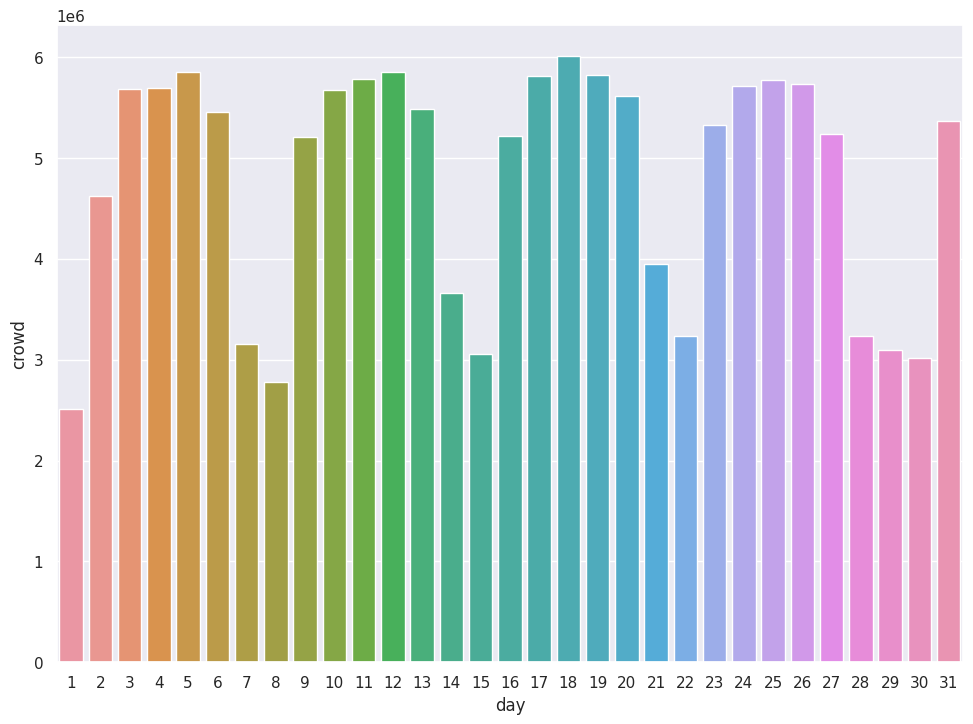

In [319]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x = "day", y = "crowd", data = day_crowd)

In [320]:
day_crowd.crowd.sum()
# https://miro.medium.com/v2/resize:fit:640/format:webp/1*y-jNiegv24wAJg6C-OtOGw.png

148595576

####day/station

In [321]:

day_stat = df.groupby(["day","STATION"]).crowd.sum().sort_values(ascending = False)

day_stat = pd.DataFrame(day_stat)

day_stat.head(30)

crowd
day STATION                  
19  34 ST-PENN STA   169563.0
17  34 ST-PENN STA   156816.0
5   34 ST-PENN STA   156532.0
12  FULTON ST        156175.0
    34 ST-PENN STA   155599.0
25  34 ST-PENN STA   154510.0
24  34 ST-PENN STA   154235.0
3   34 ST-PENN STA   152281.0
20  34 ST-PENN STA   151747.0
4   34 ST-PENN STA   151319.0
18  34 ST-PENN STA   150814.0
10  34 ST-PENN STA   150554.0
26  34 ST-PENN STA   148094.0
11  34 ST-PENN STA   146373.0
6   34 ST-PENN STA   144047.0
31  34 ST-PENN STA   140864.0
18  GRD CNTRL-42 ST  140080.0
27  34 ST-PENN STA   137406.0
13  34 ST-PENN STA   137213.0
19  GRD CNTRL-42 ST  137208.0
23  34 ST-PENN STA   136495.0
16  34 ST-PENN STA   136306.0
25  GRD CNTRL-42 ST  134053.0
4   GRD CNTRL-42 ST  133996.0
9   34 ST-PENN STA   133514.0
17  GRD CNTRL-42 ST  132882.0
24  GRD CNTRL-42 ST  132539.0
11  GRD CNTRL-42 ST  132261.0
3   GRD CNTRL-42 ST  131624.0
5   GRD CNTRL-42 ST  130971.0

In [322]:
day_stat = day_stat.reset_index()
day_stat


,day,STATION,crowd
0,19,34 ST-PENN STA,169563.0
1,17,34 ST-PENN STA,156816.0
2,5,34 ST-PENN STA,156532.0
3,12,FULTON ST,156175.0
4,12,34 ST-PENN STA,155599.0
...,...,...,...
11721,8,88 ST,0.0
11722,30,AVENUE P,0.0
11723,22,BEACH 60 ST,0.0
11724,22,BEACH 67 ST,0.0


In [323]:
new_df2 = pd.DataFrame(columns = ["day","STATION","crowd"])

In [324]:
day_stat.loc[(day_stat.day == 3)]

,day,STATION,crowd
7,3,34 ST-PENN STA,152281.0
28,3,GRD CNTRL-42 ST,131624.0
59,3,34 ST-HERALD SQ,105106.0
82,3,23 ST,100186.0
87,3,86 ST,99637.0
...,...,...,...
11391,3,AQUEDUCT RACETR,547.0
11423,3,TOMPKINSVILLE,383.0
11445,3,BEACH 105 ST,356.0
11500,3,BROAD CHANNEL,230.0


In [325]:
for day in range(1,31): # Let's take the 3 stations that the most traffic on a daily basis.
  a = day_stat.loc[(day_stat.day == day)].head(3)
  #print(a)
  a = pd.DataFrame(a)
  new_df2 = pd.concat([a,new_df2])

In [326]:
new_df2[:10]

,day,STATION,crowd
233,30,34 ST-HERALD SQ,72803.0
252,30,34 ST-PENN STA,69176.0
254,30,TIMES SQ-42 ST,68969.0
196,29,TIMES SQ-42 ST,80417.0
205,29,34 ST-HERALD SQ,78241.0
226,29,34 ST-PENN STA,73532.0
190,28,34 ST-HERALD SQ,81858.0
197,28,TIMES SQ-42 ST,80243.0
201,28,34 ST-PENN STA,79867.0
17,27,34 ST-PENN STA,137406.0


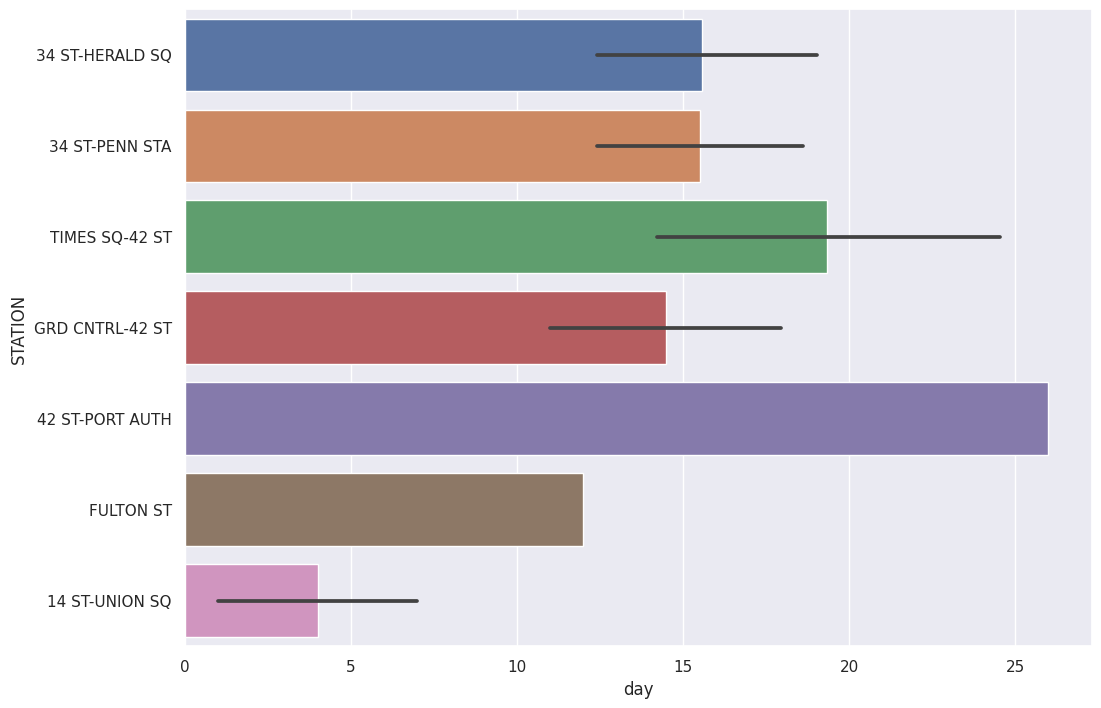

In [327]:

sns.barplot(x = "day", y = "STATION", data = new_df2).tick_params(axis='x')

# plt.xticks(rotation=45, ha='right');


####day/crowd/station

<Axes: xlabel='day', ylabel='crowd'>

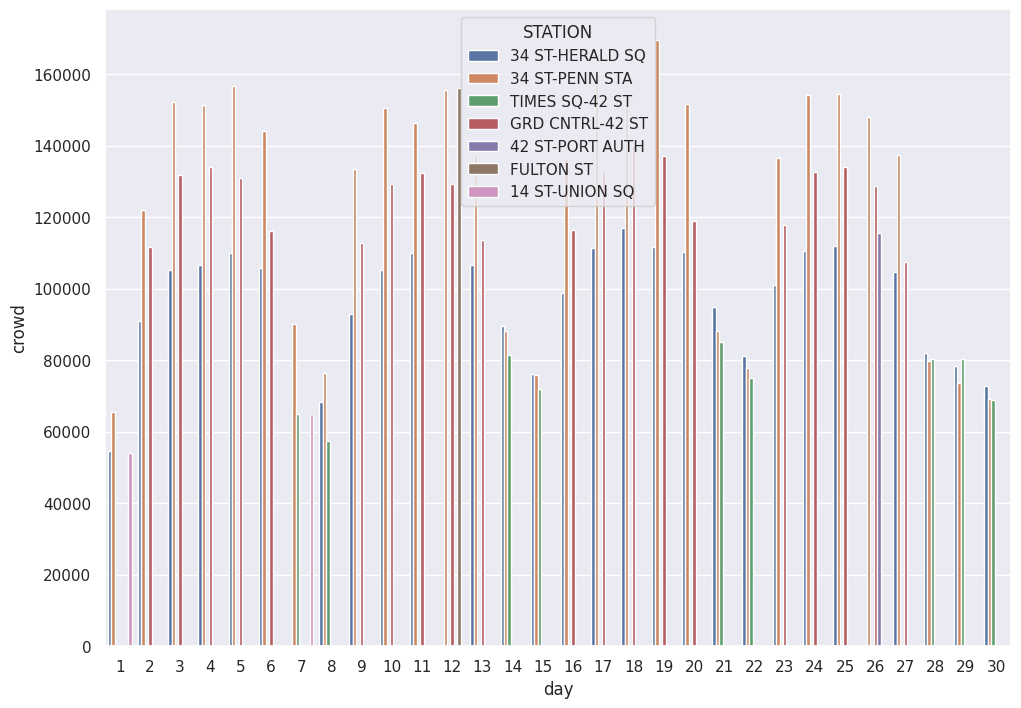

In [328]:
sns.barplot(x = "day", y = "crowd", hue = "STATION" , data = new_df2)
# Can it be reviewed on a weekly basis?

In [329]:
new_df2[:20] #I take 3 stations with the most traffic for each day.

,day,STATION,crowd
233,30,34 ST-HERALD SQ,72803.0
252,30,34 ST-PENN STA,69176.0
254,30,TIMES SQ-42 ST,68969.0
196,29,TIMES SQ-42 ST,80417.0
205,29,34 ST-HERALD SQ,78241.0
226,29,34 ST-PENN STA,73532.0
190,28,34 ST-HERALD SQ,81858.0
197,28,TIMES SQ-42 ST,80243.0
201,28,34 ST-PENN STA,79867.0
17,27,34 ST-PENN STA,137406.0


####week/crowd

In [330]:
week_crowd = day_stat.copy()
week_crowd

,day,STATION,crowd
0,19,34 ST-PENN STA,169563.0
1,17,34 ST-PENN STA,156816.0
2,5,34 ST-PENN STA,156532.0
3,12,FULTON ST,156175.0
4,12,34 ST-PENN STA,155599.0
...,...,...,...
11721,8,88 ST,0.0
11722,30,AVENUE P,0.0
11723,22,BEACH 60 ST,0.0
11724,22,BEACH 67 ST,0.0


In [331]:
week_crowd["week"] = 0 # 0 means midweek

In [332]:
week_crowd

,day,STATION,crowd,week
0,19,34 ST-PENN STA,169563.0,0
1,17,34 ST-PENN STA,156816.0,0
2,5,34 ST-PENN STA,156532.0,0
3,12,FULTON ST,156175.0,0
4,12,34 ST-PENN STA,155599.0,0
...,...,...,...,...
11721,8,88 ST,0.0,0
11722,30,AVENUE P,0.0,0
11723,22,BEACH 60 ST,0.0,0
11724,22,BEACH 67 ST,0.0,0


In [333]:
week_crowd = week_crowd.reset_index()
week_crowd.drop("index", axis = 1, inplace = True)

In [334]:
week_crowd

,day,STATION,crowd,week
0,19,34 ST-PENN STA,169563.0,0
1,17,34 ST-PENN STA,156816.0,0
2,5,34 ST-PENN STA,156532.0,0
3,12,FULTON ST,156175.0,0
4,12,34 ST-PENN STA,155599.0,0
...,...,...,...,...
11721,8,88 ST,0.0,0
11722,30,AVENUE P,0.0,0
11723,22,BEACH 60 ST,0.0,0
11724,22,BEACH 67 ST,0.0,0


In [335]:
weekend_days = [1,7,8,14,15,21,22,28,29] # weekend =1 
for i in range (len(week_crowd)):
  if week_crowd.day[i] in weekend_days:
    week_crowd.week[i] = 1

In [336]:
week_crowd

,day,STATION,crowd,week
0,19,34 ST-PENN STA,169563.0,0
1,17,34 ST-PENN STA,156816.0,0
2,5,34 ST-PENN STA,156532.0,0
3,12,FULTON ST,156175.0,0
4,12,34 ST-PENN STA,155599.0,0
...,...,...,...,...
11721,8,88 ST,0.0,1
11722,30,AVENUE P,0.0,0
11723,22,BEACH 60 ST,0.0,1
11724,22,BEACH 67 ST,0.0,1


In [337]:
week_crowd.groupby(["week"])["crowd"].sum()

week
0    119936173.0
1     28659403.0
Name: crowd, dtype: float64

In [338]:
week_crowd.loc[week_crowd.week==1]["crowd"].sum() # for checking...

28659403.0

In [340]:
week_crowd = pd.DataFrame(week_crowd.groupby(["week"])["crowd"].sum())
week_crowd = week_crowd.reset_index()

In [341]:
week_crowd

,week,crowd
0,0,119936173.0
1,1,28659403.0


<Axes: xlabel='week', ylabel='crowd'>

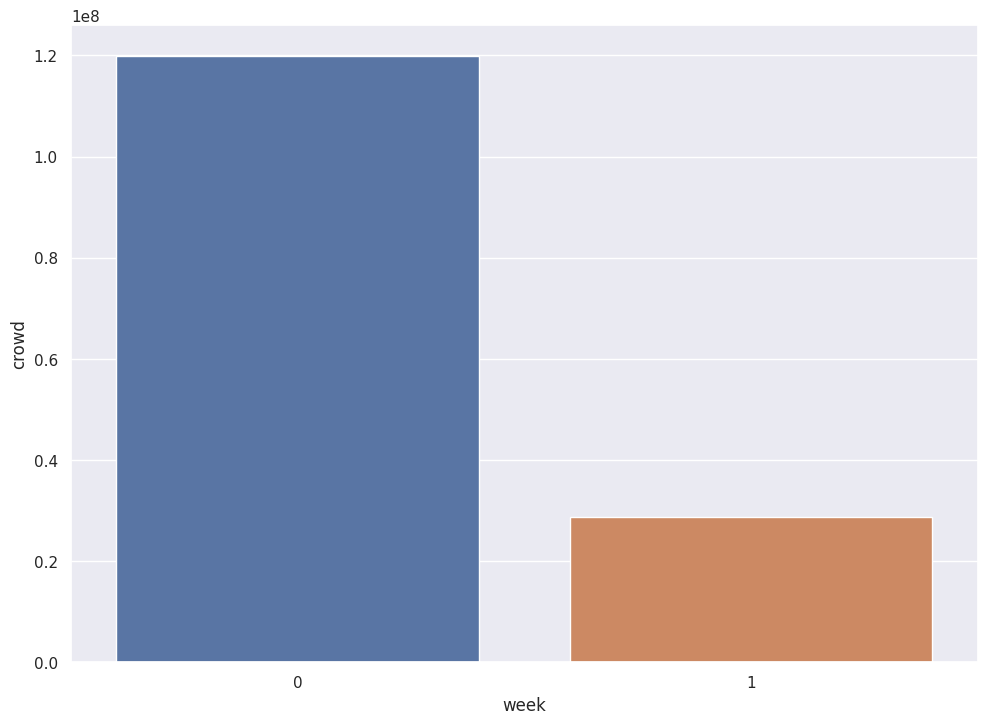

In [342]:
sns.barplot(x = "week", y = "crowd", data = week_crowd) #check y values

#### day/crowd/week

In [343]:
week_crowd2 = day_stat.copy()

In [344]:
week_crowd2["week"] = 0
week_crowd2
week_crowd2 = week_crowd2.reset_index()
week_crowd2.drop("index", axis = 1, inplace = True)
week_crowd2



,day,STATION,crowd,week
0,19,34 ST-PENN STA,169563.0,0
1,17,34 ST-PENN STA,156816.0,0
2,5,34 ST-PENN STA,156532.0,0
3,12,FULTON ST,156175.0,0
4,12,34 ST-PENN STA,155599.0,0
...,...,...,...,...
11721,8,88 ST,0.0,0
11722,30,AVENUE P,0.0,0
11723,22,BEACH 60 ST,0.0,0
11724,22,BEACH 67 ST,0.0,0


In [345]:
weekend_days = [1,7,8,14,15,21,22,28,29]
for i in range (len(week_crowd2)):
  if week_crowd2.day[i] in weekend_days:
    week_crowd2.week[i] = 1

In [346]:
week_crowd2.sort_values(["crowd","day"],ascending = False)


,day,STATION,crowd,week
0,19,34 ST-PENN STA,169563.0,0
1,17,34 ST-PENN STA,156816.0,0
2,5,34 ST-PENN STA,156532.0,0
3,12,FULTON ST,156175.0,0
4,12,34 ST-PENN STA,155599.0,0
...,...,...,...,...
11724,22,BEACH 67 ST,0.0,1
11725,22,BEACH 25 ST,0.0,1
11721,8,88 ST,0.0,1
11713,1,BEACH 44 ST,0.0,1


In [351]:
for week in range(2): # Get the 3 stations that the most traffic for the week.
  a = (week_crowd2.loc[(week_crowd2.week == week)]).head(5)
  #print(a)
  a = pd.DataFrame(a)
  week_crowd_new = pd.concat([a,week_crowd2])

In [352]:
week_crowd_new

,day,STATION,crowd,week
107,21,34 ST-HERALD SQ,94731.0,1
133,7,34 ST-PENN STA,90194.0,1
137,14,34 ST-HERALD SQ,89469.0,1
148,14,34 ST-PENN STA,88034.0,1
149,21,34 ST-PENN STA,88030.0,1
...,...,...,...,...
11721,8,88 ST,0.0,1
11722,30,AVENUE P,0.0,0
11723,22,BEACH 60 ST,0.0,1
11724,22,BEACH 67 ST,0.0,1


In [ ]:
# ??????????